<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:
- PROSES ALGORITMA KNN

1. KNN akan menghitung jarak antara nilai yang dicari dengan setiap poin/tetangga menggunakan formula euclidean distance
2. Memilih sejumlah k-tetangga terdekat, 
3. Lalu melakukan voting, melihat label terbanyak dalam tetangga tersebut. Jika 70% dari k-tetangga terdekat berlabel A, maka nilai yang dicari pun akan berlabel A


- KEKURANGAN ALGORITMA KNN

1. Sangat sensitif terhadap data pencilan (outlier). Performanya buruk jika ada data pencilan
2. Jika k genap, KNN akan kebingunan jika jumlah label dari tetangga terdekat sama. 
Misal ditentukan k=4 dan ada 2 label. Setelah dihitung dengan algoritma KNN, didapatkan bahwa 4 tetangga terdekatnya memiliki jumlah label yang sama (label A=2 tetangga, label B=2 tetangga). Maka KNN akan memilih antara kedua label tersebut secara random.
Untuk mengatasinya, gunakan `weight` . Defaultnya adalah `uniform` artinya semua jarak berbobot sama, `weigth='distance'` maka tetangga dg jarak lebih dekat memiliki bobot yg lebih besar. (user juga dpt menentukan fungsi pembobot yg lain)

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [11]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [14]:
# np.arange(2,21)

Object `X_train.ravel` not found.


Uniform scores: 
 [0.694, 0.806, 0.722, 0.667, 0.639, 0.75, 0.639, 0.694, 0.694, 0.722, 0.639, 0.667, 0.639, 0.667, 0.611, 0.667, 0.639, 0.667, 0.611] 

Distance scores: 
 [0.75, 0.833, 0.778, 0.75, 0.722, 0.75, 0.694, 0.722, 0.694, 0.694, 0.694, 0.694, 0.694, 0.667, 0.667, 0.667, 0.667, 0.667, 0.667] 



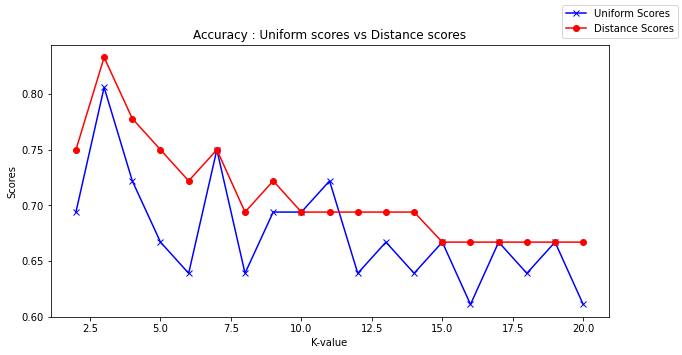

In [28]:
from sklearn.neighbors import KNeighborsClassifier as knn
weights = ['uniform', 'distance']
k_value = np.arange(2,21)
data_list = [[],[]]
for w in weights:
    for k in k_value:
        model_knn = knn(n_neighbors=k, weights=w)
        model_knn.fit(X_train, y_train)
        
        # predict
        y_predict = model_knn.predict(X_test)
        scores = round(model_knn.score(X_test, y_test),3)
        
        # put the score into the list
        if w == 'uniform':
            data_list[0].append(scores)
        else:
            data_list[1].append(scores)
            
print('Uniform scores: \n', data_list[0],'\n')
print('Distance scores: \n', data_list[1],'\n')

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(k_value, data_list[0], marker='x', color='b', label='Uniform Scores')
ax.plot(k_value, data_list[1], marker='o', color='r', label='Distance Scores')
ax.set_xlabel('K-value')
ax.set_ylabel('Scores')
ax.set_title('Accuracy : Uniform scores vs Distance scores')
fig.legend()
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [33]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X,y)

# aplikasikan hasil pembelajaran
y_predict = lr.predict(X)

# parameter
coef = lr.coef_
intercept = lr.intercept_
print('Koefisien dari model adalah', coef)
print('Intercept dari model adalah', intercept)

Koefisien dari model adalah [ 1.5 -5.   9.  10. ]
Intercept dari model adalah 0.5000000016247412
